In [5]:
# read C-VFL data

import os
import sys

# Generated by the statistic script, after monitoring the NIC we got the following results
# The unit is MB
data = {
"covtype_cvfl": {"rx_mean": 38699.83, "tx_mean": 10506.84, "rx_std": 0.00, "tx_std": 0.00},
"covtype_fedtree": {"rx_mean": 1419.77, "tx_mean": 11624.84, "rx_std": 0.00, "tx_std": 0.00},
"covtype_gal": {"rx_mean": 2651.59, "tx_mean": 2125.32, "rx_std": 0.00, "tx_std": 0.00},
"covtype_splitnn": {"rx_mean": 34938.38, "tx_mean": 432.90, "rx_std": 0.56, "tx_std": 8.93},
"epsilon_cvfl": {"rx_mean": 25459.04, "tx_mean": 7109.87, "rx_std": 0.00, "tx_std": 0.00},
"epsilon_fedtree": {"rx_mean": 2706.84, "tx_mean": 2373.50, "rx_std": 0.00, "tx_std": 0.00},
"epsilon_gal": {"rx_mean": 844.38, "tx_mean": 844.54, "rx_std": 0.00, "tx_std": 0.00},
"epsilon_splitnn": {"rx_mean": 24201.88, "tx_mean": 332.25, "rx_std": 0.39, "tx_std": 8.23},
"gisette_cvfl": {"rx_mean": 525.82, "tx_mean": 140.00, "rx_std": 0.00, "tx_std": 0.00},
"gisette_fedtree": {"rx_mean": 6049.92, "tx_mean": 44.00, "rx_std": 0.01, "tx_std": 0.03},
"gisette_gal": {"rx_mean": 53.36, "tx_mean": 31.61, "rx_std": 0.00, "tx_std": 0.00},
"gisette_splitnn": {"rx_mean": 401.75, "tx_mean": 28.25, "rx_std": 0.38, "tx_std": 0.59},
"letter_cvfl": {"rx_mean": 1078.81, "tx_mean": 559.91, "rx_std": 0.00, "tx_std": 0.00},
"letter_fedtree": {"rx_mean": 569.52, "tx_mean": 986.83, "rx_std": 0.00, "tx_std": 0.00},
"letter_gal": {"rx_mean": 1008.41, "tx_mean": 215.57, "rx_std": 0.00, "tx_std": 0.00},
"letter_splitnn": {"rx_mean": 937.14, "tx_mean": 33.46, "rx_std": 0.21, "tx_std": 0.58},
"msd_cvfl": {"rx_mean": 29031.89, "tx_mean": 7575.59, "rx_std": 0.00, "tx_std": 0.00},
"msd_fedtree": {"rx_mean": 405.96, "tx_mean": 1330.31, "rx_std": 0.00, "tx_std": 0.00},
"msd_gal": {"rx_mean": 329.23, "tx_mean": 215.37, "rx_std": 0.00, "tx_std": 0.00},
"msd_splitnn": {"rx_mean": 27896.21, "tx_mean": 346.86, "rx_std": 2.57, "tx_std": 5.91},
"radar_cvfl": {"rx_mean": 20275.09, "tx_mean": 5380.46, "rx_std": 0.00, "tx_std": 0.00},
"radar_fedtree": {"rx_mean": 3091.54, "tx_mean": 6502.35, "rx_std": 0.00, "tx_std": 0.00},
"radar_gal": {"rx_mean": 1422.04, "tx_mean": 944.82, "rx_std": 0.00, "tx_std": 0.00},
"radar_splitnn": {"rx_mean": 19636.84, "tx_mean": 256.92, "rx_std": 35.92, "tx_std": 17.93},
"realsim_cvfl": {"rx_mean": 5154.64, "tx_mean": 1511.52, "rx_std": 0.00, "tx_std": 0.00},
"realsim_fedtree": {"rx_mean": 20713.81, "tx_mean": 284.38, "rx_std": 0.00, "tx_std": 0.00},
"realsim_gal": {"rx_mean": 397.05, "tx_mean": 133.26, "rx_std": 0.00, "tx_std": 0.00},
"realsim_splitnn": {"rx_mean": 4646.34, "tx_mean": 119.74, "rx_std": 0.28, "tx_std": 6.32},
}

def read_dataset(name):
    result = [    ]
    
    for d in ['C-VFL', 'FedTree', 'GAL', 'SplitNN']:
        fname = os.path.join(d, name+".csv")
        # print(fname)
        f = open(fname, "r")
        lines = f.readlines()
        f.close()

        epochs = []
        accs = []
        for line in lines:
            epochs.append(int(line.split(",")[0].strip())+ 1) # epoch 从1开始
            acc = float(line.split(",")[1].strip())
            if d in ["SplitNN", 'FedTree']:
                if name != "msd":
                    acc = acc * 100
            accs.append(acc)
        
        result.append((d, name, epochs[:199], accs[:199]))
    return result

def epoch_to_MB(epochs, dataset, algo):
    # map epochs to MB
    result = []
    for e in epochs:
        if algo == "C-VFL":
            algo = "cvfl"
        elif algo == "FedTree":
            algo = "fedtree"
        elif algo == "GAL":
            algo = "gal"
        elif algo == "SplitNN":
            algo = "splitnn"
        total = data[f"{dataset}_{algo}"]['rx_mean'] + data[f"{dataset}_{algo}"]['tx_mean']
        total = total / 50
        result.append(e * total)
    return result


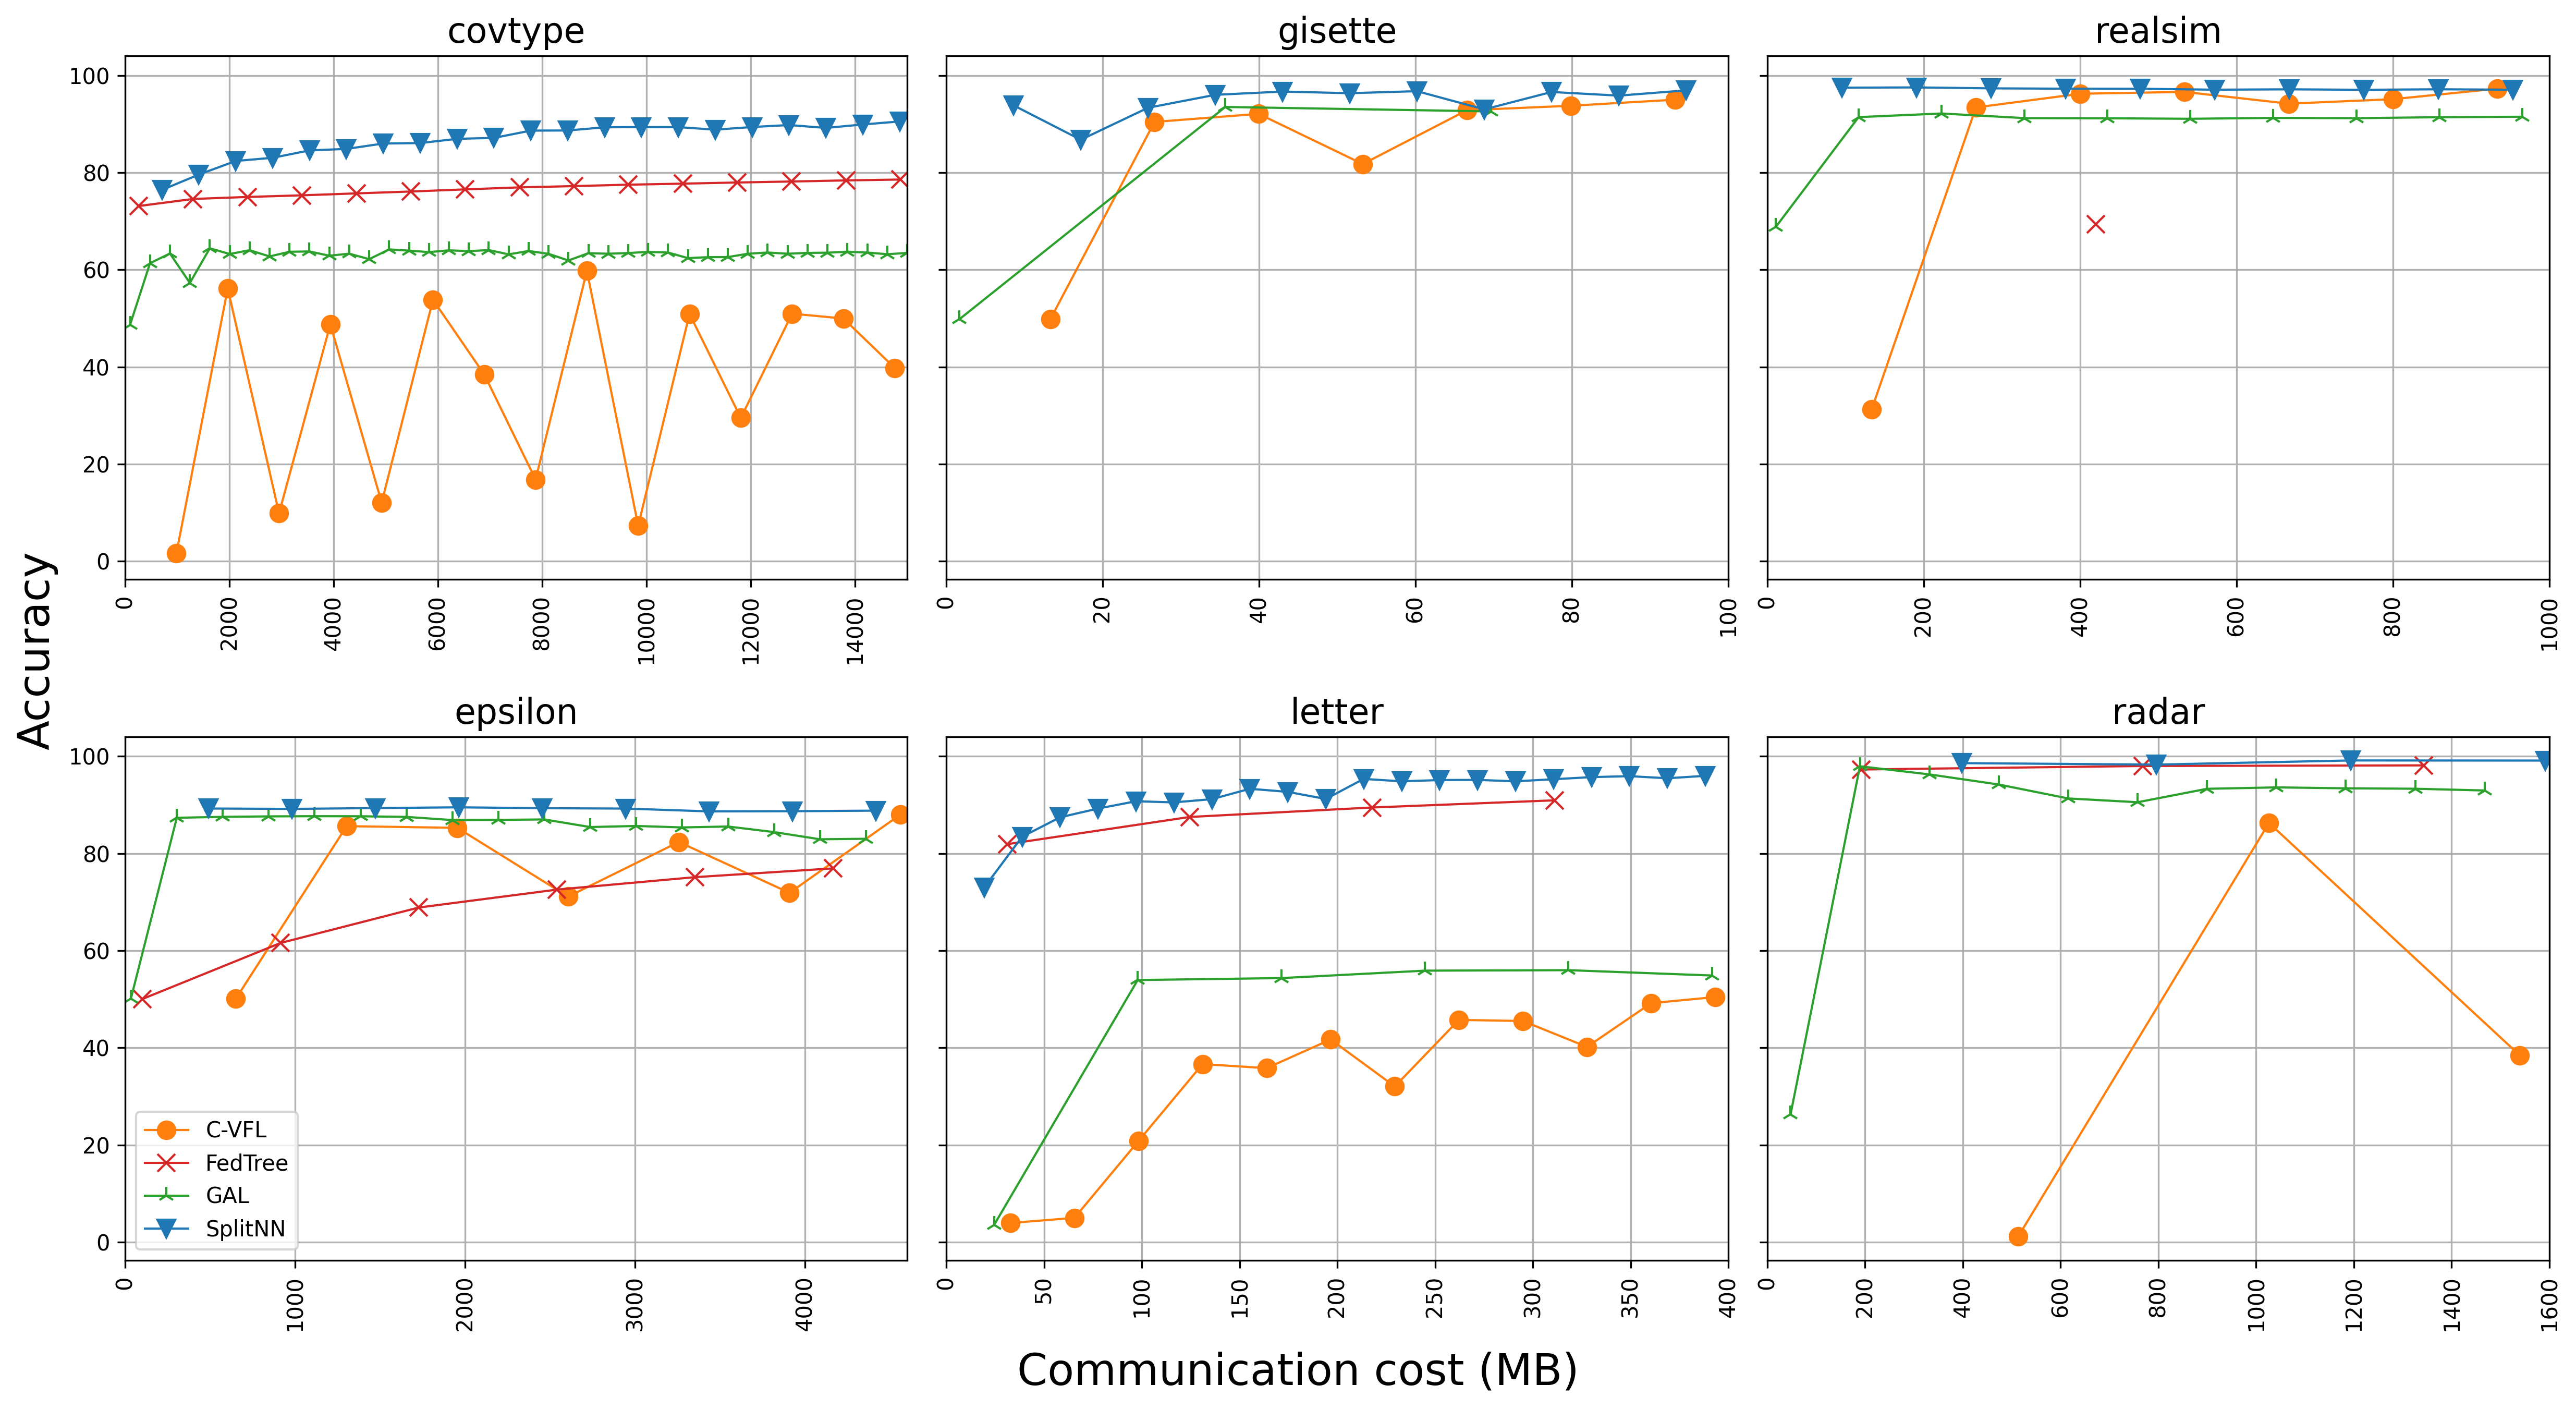

In [6]:
import matplotlib.pyplot as plt

markers = {
    "FedTree": "x",
    "C-VFL": "o",
    "GAL": "2",
    "SplitNN": "v"
}

colors = {
    "FedTree": "#d62728",
    "C-VFL": "#ff7f0e",
    "GAL": "#2ca02c",
    "SplitNN": "#1f77b4"
}

def draw(dataset, ax):
    epochs = []
    accs = []

    for file in read_dataset(dataset):
        algo = file[0]
        dataset = file[1]
        epochs = epoch_to_MB(file[2], dataset, algo)
        accs = file[3]
        
        if dataset == "letter":
            epochs = [x for x in epochs if x <= 400]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 400)
            ax.axis(xmin=0, xmax=400)
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::3]
                accs = accs[::3]

        if dataset == "gisette":
            epochs = [x for x in epochs if x <= 100]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 100)
            ax.axis(xmin=0, xmax=100)
            # sparse the points
            if algo in ["FedTree"]:
                epochs = epochs[::5]
                accs = accs[::5]
            if algo in ['GAL']:
                epochs = epochs[::20]
                accs = accs[::20]

        if dataset == "radar":
            epochs = [x for x in epochs if x <= 1600]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 1600)
            ax.axis(xmin=0, xmax=1600)
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::3]
                accs = accs[::3]
                
        if dataset == "realsim":
            epochs = [x for x in epochs if x <= 1000]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 1000)
            ax.axis(xmin=0, xmax=1000)
            # sparse the points
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::10]
                accs = accs[::10]
        
        if dataset == "covtype":
            epochs = [x for x in epochs if x <= 15000]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 15000)
            ax.axis(xmin=0, xmax=15000)
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::4]
                accs = accs[::4]
                
        if dataset == "epsilon":
            epochs = [x for x in epochs if x <= 4600]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 4600)
            ax.axis(xmin=0, xmax=4600)
            if algo in ["FedTree"]:
                epochs = epochs[::8]
                accs = accs[::8]
            if algo in ['GAL']:
                epochs = epochs[::8]
                accs = accs[::8]
        
        if dataset == "msd":
            epochs = [x for x in epochs if x <= 6000]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 6000)
            ax.axis(xmin=0, xmax=6000)
            if algo in ["FedTree"]:
                epochs = epochs[::6]
                accs = accs[::6]
            if algo in ['GAL']:
                epochs = epochs[:30:6]
                accs = accs[:30:6]
        
        ax.tick_params(axis='x', rotation=90, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.plot(epochs, accs, label=algo, marker=markers[algo], markersize=8, linewidth=1, color=colors[algo])

    
    ax.set_title(dataset, fontsize=16)
    ax.grid(True)

datasets = ["covtype", "gisette", "realsim", "epsilon", "letter", "radar"]
fig, axs = plt.subplots(2, 3,figsize=(20, 10), sharey=True, gridspec_kw={'wspace': 0.05, 'hspace': 0.3}, dpi=300)

# 在每个子图中绘制数据集
for i, dataset in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    draw(dataset, ax)
    if dataset == "msd":
        ax.set_ylabel("RMSE", fontsize=16)

axs[1, 0].legend()
# fig.suptitle("Accuracy and communication cost of different algorithms on different datasets", y=1.03)
fig.supxlabel('Communication cost (MB)', x=0.5, y=0.025, fontsize=20)
fig.supylabel('Accuracy', x=0.09, y=0.5, fontsize=20)
fig.savefig(f"communication_accuracy.png", bbox_inches='tight', dpi=300)
plt.show()

/var/folders/nz/gspwhgsx5wsfn8g8_r26dcz80000gn/T/ipykernel_86092/261290698.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


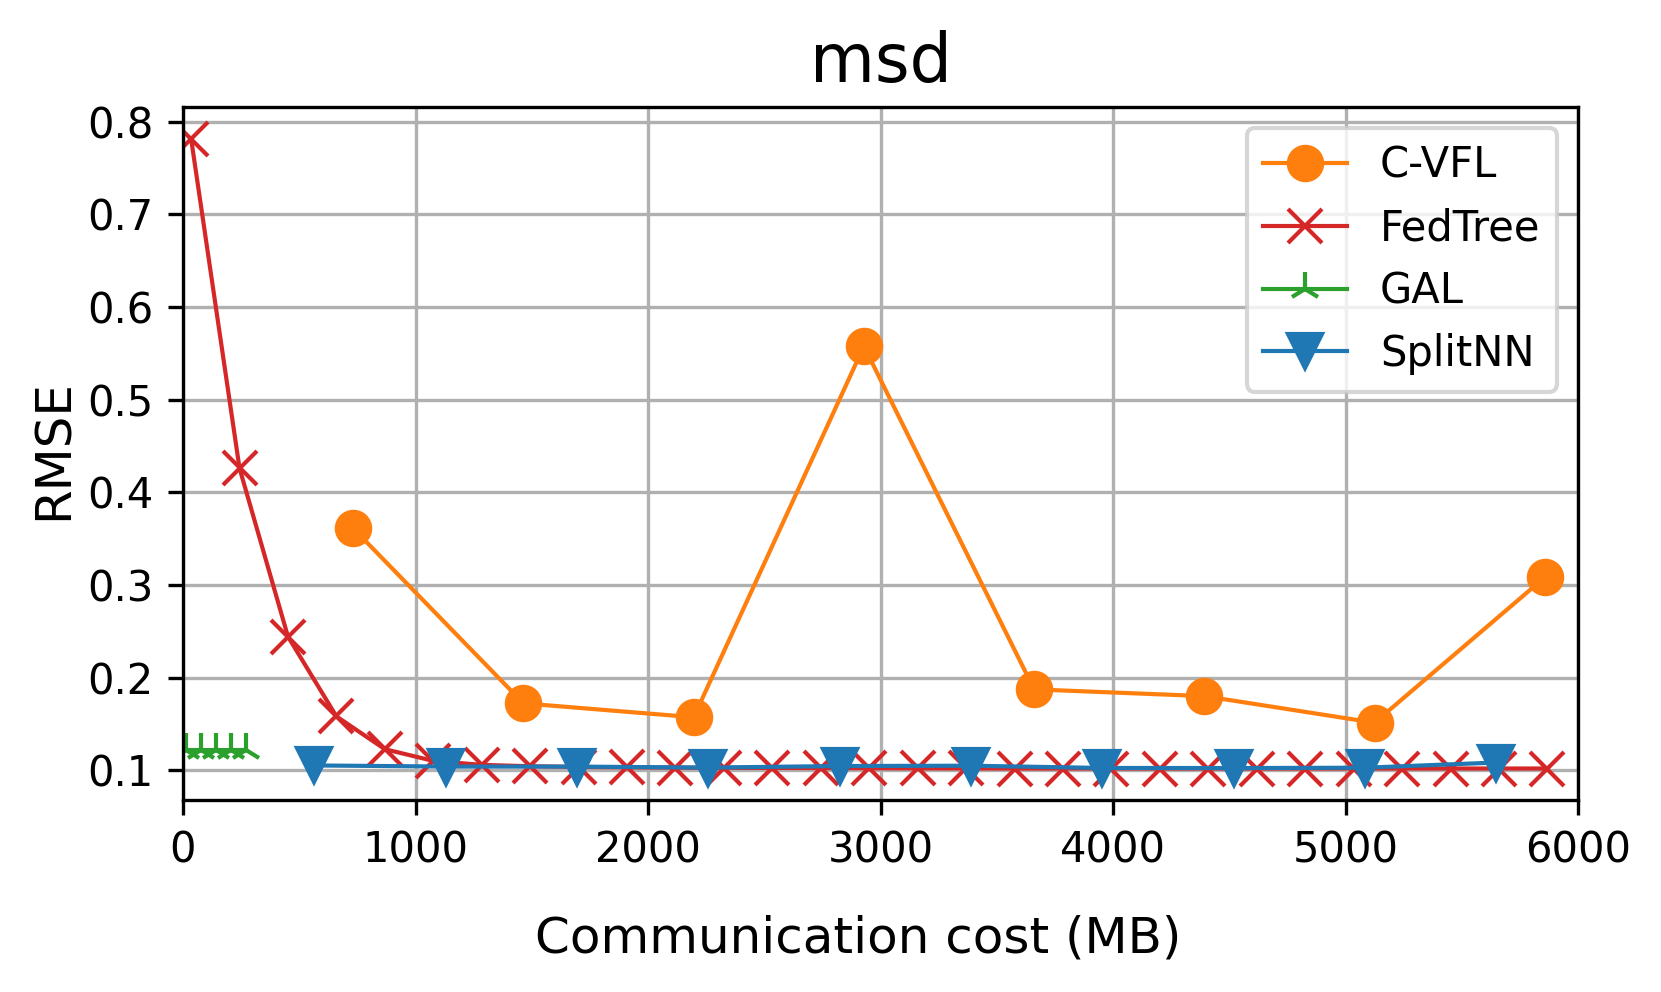

In [7]:
fig, axs = plt.subplots(1,1,figsize=(6, 3), sharey=True, gridspec_kw={'wspace': 0.05, 'hspace': 0.3}, dpi=300)

draw("msd", axs)
axs.tick_params(axis='x', rotation=0, labelsize=10)
axs.legend()
fig.supylabel("RMSE", x=0.04)
fig.supxlabel("Communication cost (MB)", y=-0.07)
fig.savefig("communication_rmse.png", bbox_inches='tight', dpi=300)
fig.show()